<font color = 'brown'>
    
# Giriş

<font color = 'black'>
    
Günümüzde otomobil piyasasında araç fiyatlarının doğru bir şekilde tahmin edilmesi, hem alıcılar hem de satıcılar için büyük bir öneme sahiptir. Bir aracın fiyatı; markası, modeli, üretim yılı, kilometresi, yakıt türü, vites tipi ve ek donanımları gibi birçok faktörden etkilenmektedir. Doğru fiyat tahmini yapmak, tüketicilerin bilinçli satın alma kararları vermesine yardımcı olurken, otomobil bayileri ve üreticiler için de rekabetçi fiyatlandırma stratejileri oluşturmada kritik bir rol oynar.

Bu veri seti, araçların teknik özellikleri, performans kriterleri ve pazarla ilgili detayları içermektedir. Veriyi analiz ederek, fiyatlandırmayı etkileyen temel faktörleri belirleyebilir ve araçların piyasa değerini tahmin edebilen güçlü modeller geliştirebiliriz.

Bu çalışmanın temel amacı, otomobil fiyatlarını etkileyen anahtar faktörleri analiz ederek doğru tahminler yapabilen bir model geliştirmektir. Bu amaç doğrultusunda istatistiksel analizler, makine öğrenmesi algoritmaları ve derin öğrenme teknikleri kullanılarak tahmin modelleri oluşturulacaktır. Elde edilen bulgular, bireysel kullanıcılar, otomotiv sektörü ve finans kuruluşları için veri odaklı kararlar almalarına yardımcı olabilir.

Bu projede, veri temizleme, özellik mühendisliği, keşifsel veri analizi (EDA) ve modelleme aşamaları detaylı bir şekilde ele alınacaktır. Doğruluk oranını artırmak için geleneksel makine öğrenmesi yöntemleri ve derin öğrenme modelleri uygulanacaktır.

Geliştirilecek tahmin modelleri, otomobil fiyatlandırmasında şeffaflığı artırarak piyasa belirsizliklerini azaltmayı ve otomotiv sektöründeki paydaşlar için değerli içgörüler sağlamayı amaçlamaktadır.

<font color = 'green'>
    
### İçerik:

[Veri Yükleme ve İnceleme](#1)
    
[Veri Açıklaması](#a)
    
[Verileri belirli gereksinimlere getirme](#2)
    
[Veri Görselleştirme](#3)
    
[ML ve DL için kodlama ve ölçeklendirme](#4)
    
[Makine Öğrenmesi Metodları](#5)

<h2 id="veri-yukleme">Veri Yükleme ve İnceleme</h2>


In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [80]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv")

In [81]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [83]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [84]:
for i in df.columns:
    print("*****************\n")
    print(i)
    print(df[i].value_counts())
    print("*****************\n")

*****************

Make
Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64
*****************

*****************

Model
Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
            

<a id="a"></a>  
# **Veri Açıklaması**  

1. **Marka (Make)**: Arabanın markası (Örneğin: BMW, Toyota, Honda).  
1. **Model**: Arabanın modeli (Örneğin: Civic, Corolla, X5).  
1. **Fiyat (Price)**: Arabanın fiyatı (Para birimi belirtilmemiş).  
1. **Yıl (Year)**: Arabanın üretim yılı.  
1. **Kilometre (Kilometer)**: Arabanın toplam kat ettiği mesafe.  
1. **Yakıt Türü (Fuel Type)**: Kullanılan yakıt türü (Örneğin: Benzin, Dizel, Elektrik).  
1. **Vites Türü (Transmission)**: Şanzıman tipi (Otomatik / Manuel).  
1. **Konum (Location)**: Arabanın satışta olduğu yer.  
1. **Renk (Color)**: Arabanın rengi (Örneğin: Siyah, Beyaz, Mavi).  
1. **Sahiplik Durumu (Owner)**: Arabanın kaçıncı sahibi olduğu (Örneğin: İlk sahibi, İkinci sahibi).  
1. **Satıcı Türü (Seller Type)**: Satıcının türü (Galeri, Bireysel Satıcı vb.).  
1. **Motor Hacmi (Engine)**: Motor hacmi (cc) cinsinden (Örneğin: 1498 cc).  
1. **Maksimum Güç (Max Power)**: Motorun üretebildiği maksimum güç (Genellikle beygir gücü - HP cinsinden).  
1. **Maksimum Tork (Max Torque)**: Motorun üretebildiği maksimum tork (Genellikle Newton metre - Nm cinsinden).  
1. **Çekiş Sistemi (Drivetrain)**: Arabanın çekiş türü (Önden Çekiş, Arkadan Çekiş, Dört Çeker).  
1. **Uzunluk (Length)**: Arabanın uzunluğu (mm veya cm cinsinden).  
1. **Genişlik (Width)**: Arabanın genişliği (mm veya cm cinsinden).  
1. **Yükseklik (Height)**: Arabanın yüksekliği (mm veya cm cinsinden).  
1. **Oturma Kapasitesi (Seating Capacity)**: Arabanın kaç kişilik olduğu (Örneğin: 2, 4, 5, 7).  
1. **Yakıt Depo Kapasitesi (Fuel Tank Capacity)**: Arabanın yakıt deposu kapasitesi (litre cinsinden).

<a id = "2"></a>
# Verileri belirli gereksinimlere getirmek

In [85]:
del(df["Model"])
del(df["Location"])

In [86]:
# Engine sütunu için temizleme işlemi
df['Engine'] = df['Engine'].str.extract(r'(\d+)')  # Sadece sayıları al
df['Engine'] = df['Engine'].astype(float)  # Sayısal tipe çevir

In [87]:
# Max Power sütununu ayırma
df[['Power (bhp)', 'Power RPM']] = df['Max Power'].str.extract(r'(\d+)\s*bhp\s*@?\s*(\d*)')
df['Power (bhp)'] = pd.to_numeric(df['Power (bhp)'], errors='coerce')
df['Power RPM'] = pd.to_numeric(df['Power RPM'], errors='coerce')

# Eksik verileri temizleme
df.dropna(subset=['Power (bhp)'], inplace=True)

In [88]:
df[['Torque (Nm)', 'RPM']] = df['Max Torque'].str.extract(r'(\d+)\s*Nm?\s*@?\s*(\d+)')
df['Torque (Nm)'] = df['Torque (Nm)'].astype(float)  # Sayısal veri türüne çevir
df['RPM'] = df['RPM'].astype(float)  # Sayısal veri türüne çevir


In [89]:
df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean(), inplace=True)
df['Power RPM'].fillna(df['Power RPM'].median(), inplace=True)
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0], inplace=True)

In [90]:
del(df["Max Torque"])
del(df["Max Power"])

In [91]:
for i in df.columns:
    print("*****************\n")
    print(i)
    print(df[i].value_counts())
    print("*****************\n")

*****************

Make
Make
Maruti Suzuki    385
Hyundai          320
Mercedes-Benz    149
Honda            134
Audi             118
Toyota           116
BMW              116
Mahindra         112
Ford              46
Tata              46
Renault           43
Volkswagen        42
Skoda             37
Land Rover        32
Kia               23
MG                16
Jeep              16
Volvo             16
Nissan            15
Jaguar            13
Porsche           12
MINI              11
Datsun             8
Lexus              5
Mitsubishi         4
Chevrolet          4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Maserati           1
Ferrari            1
Lamborghini        1
Fiat               1
Name: count, dtype: int64
*****************

*****************

Price
Price
425000     26
625000     24
650000     21
450000     19
675000     18
           ..
426999      1
8600000     1
1911000     1
436000      1
670000      1
Name: count, Length: 591, dtype: int64
*********

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1851 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1851 non-null   object 
 1   Price               1851 non-null   int64  
 2   Year                1851 non-null   int64  
 3   Kilometer           1851 non-null   int64  
 4   Fuel Type           1851 non-null   object 
 5   Transmission        1851 non-null   object 
 6   Color               1851 non-null   object 
 7   Owner               1851 non-null   object 
 8   Seller Type         1851 non-null   object 
 9   Engine              1851 non-null   float64
 10  Drivetrain          1851 non-null   object 
 11  Length              1851 non-null   float64
 12  Width               1851 non-null   float64
 13  Height              1851 non-null   float64
 14  Seating Capacity    1851 non-null   float64
 15  Fuel Tank Capacity  1851 non-null   float64
 16  Power (bhp)

In [93]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers



In [94]:
non_categ_variables = ["Price","Kilometer","Engine",
                      "Length","Width","Height","Power (bhp)","Torque (Nm)"
                      ]
categ_variables = [ 'Make',"Year","Fuel Type","Transmission","Color","Owner",
                   "Seller Type","Drivetrain","Seating Capacity","Fuel Tank Capacity",
                   "Power RPM","RPM"
                   
                  ] 

In [95]:

df.loc[detect_outliers(df,non_categ_variables)]


,Make,Price,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power (bhp),Power RPM,Torque (Nm),RPM
160,Mercedes-Benz,11500000,2016,27000,Petrol,Automatic,Blue,First,Individual,4663.0,RWD,5453.0,1899.0,1498.0,4.0,70.000000,453.0,5250.0,700.0,1800.0
305,Porsche,9300000,2019,9000,Petrol,Automatic,Blue,First,Corporate,3436.0,AWD,4491.0,1852.0,1304.0,4.0,68.000000,325.0,7400.0,390.0,5600.0
442,Mercedes-Benz,18500000,2021,21000,Petrol,Automatic,Black,First,Individual,3982.0,RWD,5462.0,1899.0,1498.0,4.0,70.000000,463.0,5250.0,700.0,2000.0
483,Ferrari,35000000,2018,9500,Petrol,Automatic,Black,First,Individual,3902.0,RWD,4568.0,1952.0,1213.0,2.0,78.000000,660.0,8000.0,760.0,3000.0
510,Lamborghini,24000000,2016,6000,Petrol,Automatic,Blue,First,Individual,5204.0,AWD,4459.0,1924.0,1165.0,2.0,52.201382,602.0,8250.0,560.0,6500.0
542,Mercedes-Benz,13000000,2021,20000,Diesel,Automatic,Blue,First,Individual,2925.0,AWD,5207.0,2157.0,1823.0,7.0,90.000000,326.0,3600.0,700.0,1200.0
977,Rolls-Royce,18000000,2011,60000,Petrol,Automatic,Maroon,Second,Corporate,6592.0,RWD,5399.0,1948.0,1550.0,5.0,82.500000,570.0,5250.0,780.0,1500.0
1035,Ford,8000000,2017,25000,Petrol,Automatic,Black,Third,Individual,4951.0,RWD,4784.0,2080.0,1391.0,4.0,60.900000,396.0,6500.0,515.0,4250.0
1246,Rolls-Royce,20000000,2011,27000,Petrol,Automatic,Blue,Third,Individual,6592.0,RWD,5569.0,1948.0,1550.0,5.0,82.500000,570.0,5250.0,780.0,1500.0
1369,Rolls-Royce,20000000,2012,55000,Petrol,Automatic,White,Third,Individual,6592.0,RWD,5569.0,1948.0,1550.0,5.0,82.500000,570.0,5250.0,780.0,1500.0


In [96]:
outlier_indices = detect_outliers(df, non_categ_variables)  # Aykırı indeksleri al
df = df.drop(index=outlier_indices)  # Aykırı değerleri sil


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1836 non-null   object 
 1   Price               1836 non-null   int64  
 2   Year                1836 non-null   int64  
 3   Kilometer           1836 non-null   int64  
 4   Fuel Type           1836 non-null   object 
 5   Transmission        1836 non-null   object 
 6   Color               1836 non-null   object 
 7   Owner               1836 non-null   object 
 8   Seller Type         1836 non-null   object 
 9   Engine              1836 non-null   float64
 10  Drivetrain          1836 non-null   object 
 11  Length              1836 non-null   float64
 12  Width               1836 non-null   float64
 13  Height              1836 non-null   float64
 14  Seating Capacity    1836 non-null   float64
 15  Fuel Tank Capacity  1836 non-null   float64
 16  Power (bhp)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1836 non-null   object 
 1   Price               1836 non-null   int64  
 2   Year                1836 non-null   int64  
 3   Kilometer           1836 non-null   int64  
 4   Fuel Type           1836 non-null   object 
 5   Transmission        1836 non-null   object 
 6   Color               1836 non-null   object 
 7   Owner               1836 non-null   object 
 8   Seller Type         1836 non-null   object 
 9   Engine              1836 non-null   float64
 10  Drivetrain          1836 non-null   object 
 11  Length              1836 non-null   float64
 12  Width               1836 non-null   float64
 13  Height              1836 non-null   float64
 14  Seating Capacity    1836 non-null   float64
 15  Fuel Tank Capacity  1836 non-null   float64
 16  Power (bhp)

<a id = "3"></a>
# Veri Görselleştirme

In [99]:
non_categ_variables = ["Price","Kilometer","Engine",
                      "Length","Width","Height","Power (bhp)","Torque (Nm)"
                      ]
categ_variables = [ 'Make',"Year","Fuel Type","Transmission","Color","Owner",
                   "Seller Type","Drivetrain","Seating Capacity","Fuel Tank Capacity",
                   "Power RPM","RPM"
                   
                  ] 

In [100]:
for i in non_categ_variables:
    for j in categ_variables:
        print(df[[j,i]].groupby([j], as_index = False).mean().sort_values(by=i,ascending = True))
        print("\n\n")


             Make         Price
3          Datsun  2.978750e+05
2       Chevrolet  2.984998e+05
4            Fiat  3.750000e+05
23        Renault  4.695813e+05
21         Nissan  4.776667e+05
17  Maruti Suzuki  5.715506e+05
6           Honda  6.714104e+05
7         Hyundai  7.662093e+05
28     Volkswagen  7.817380e+05
25      Ssangyong  8.500000e+05
26           Tata  1.019739e+06
16       Mahindra  1.119018e+06
5            Ford  1.236523e+06
20     Mitsubishi  1.348750e+06
24          Skoda  1.384865e+06
11            Kia  1.569913e+06
27         Toyota  1.858965e+06
8           Isuzu  1.945500e+06
10           Jeep  2.003687e+06
14             MG  2.019375e+06
0            Audi  2.808924e+06
15           MINI  3.054909e+06
29          Volvo  3.090875e+06
9          Jaguar  3.840308e+06
1             BMW  3.885345e+06
19  Mercedes-Benz  4.417280e+06
13          Lexus  4.530000e+06
12     Land Rover  6.771500e+06
18       Maserati  9.000000e+06
22        Porsche  9.680000e+06



    Y

In [101]:
for i in non_categ_variables:
    if i != "Year":
        print(df[[i,"Year"]].groupby([i], as_index = False).mean().sort_values(by="Year",ascending = True))
        print("\n")

       Price    Year
4     175000  2008.0
0     141000  2009.0
1     145000  2009.0
7     190000  2009.5
2     155000  2010.0
..       ...     ...
359  1911000  2022.0
521  5651000  2022.0
548  7100000  2022.0
567  9390000  2022.0
565  9100000  2022.0

[582 rows x 2 columns]


     Kilometer    Year
474      56852  2009.0
471      56400  2009.0
753     130000  2009.0
660      83359  2010.0
692      91000  2011.0
..         ...     ...
20        2766  2022.0
19        2700  2022.0
18        2670  2022.0
28        4000  2022.0
0            0  2022.0

[779 rows x 2 columns]


    Engine         Year
42  1799.0  2008.000000
89  4663.0  2011.000000
61  2354.0  2011.000000
87  3498.0  2011.000000
4    936.0  2011.000000
..     ...          ...
19  1353.0  2020.700000
51  1996.0  2020.833333
83  2998.0  2021.000000
17  1332.0  2021.000000
58  2184.0  2021.230769

[90 rows x 2 columns]


     Length         Year
37   3900.0  2010.000000
106  4545.0  2010.333333
207  5226.0  2011.000000
182  49

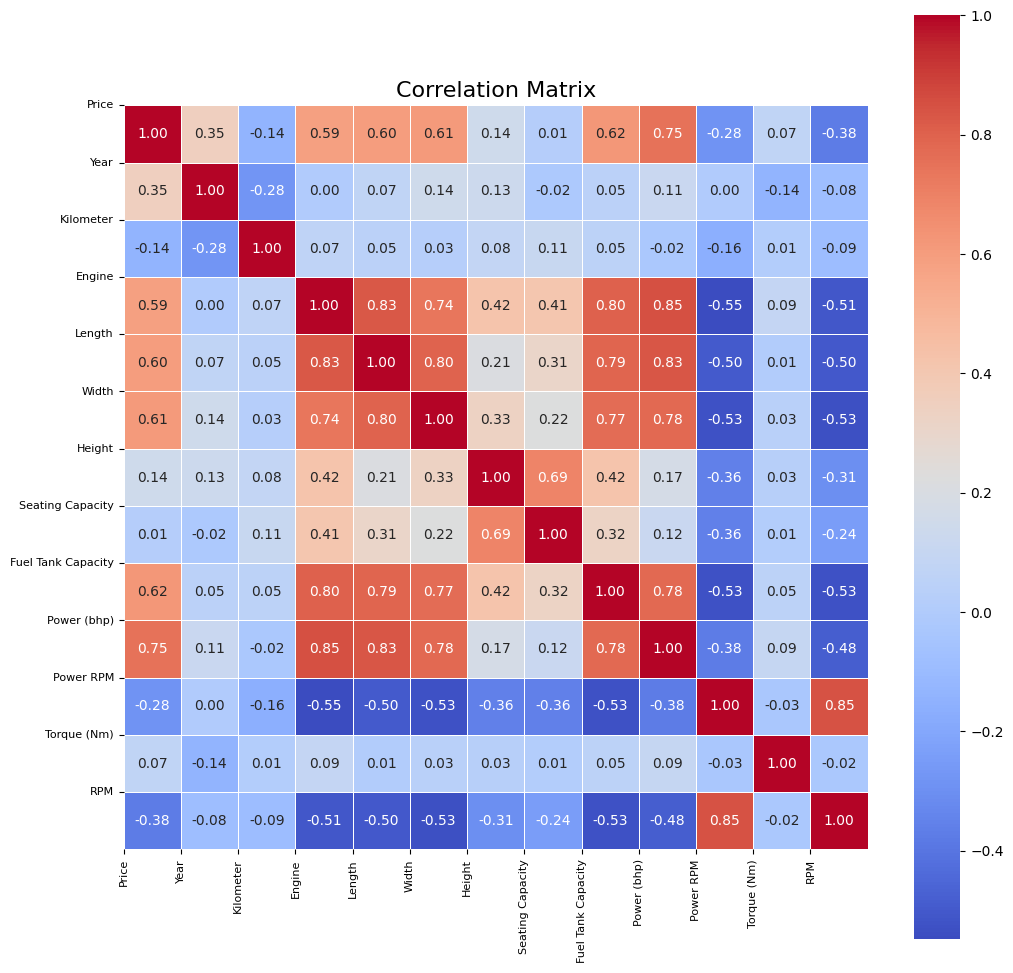

In [102]:
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

f = plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.7)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8, rotation=90)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [103]:
for i in df.columns:
    print("*****************\n")
    print(i)
    print(df[i].value_counts())
    print("*****************\n")

*****************

Make
Make
Maruti Suzuki    385
Hyundai          320
Mercedes-Benz    143
Honda            134
Audi             118
Toyota           116
BMW              116
Mahindra         112
Tata              46
Ford              44
Renault           43
Volkswagen        42
Skoda             37
Land Rover        32
Kia               23
Volvo             16
Jeep              16
MG                16
Nissan            15
Jaguar            13
MINI              11
Porsche           10
Datsun             8
Lexus              5
Mitsubishi         4
Chevrolet          4
Ssangyong          3
Isuzu              2
Maserati           1
Fiat               1
Name: count, dtype: int64
*****************

*****************

Price
Price
425000     26
625000     24
650000     21
450000     19
675000     18
           ..
3995000     1
1035000     1
9200000     1
426999      1
670000      1
Name: count, Length: 582, dtype: int64
*****************

*****************

Year
Year
2017    260
2018    259


In [104]:
def bar_plot(variable):
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    plt.figure(figsize = (12,4))
    sns.barplot(x=df[variable],y=df["Price"])
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("{} and Amount relation".format(variable))
    plt.show()

    print("{}: \n {}".format(variable,varValue))
    

In [105]:
def plot_hist(variable):
    
    plt.figure(figsize=(5, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.xticks(rotation=90) 
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()



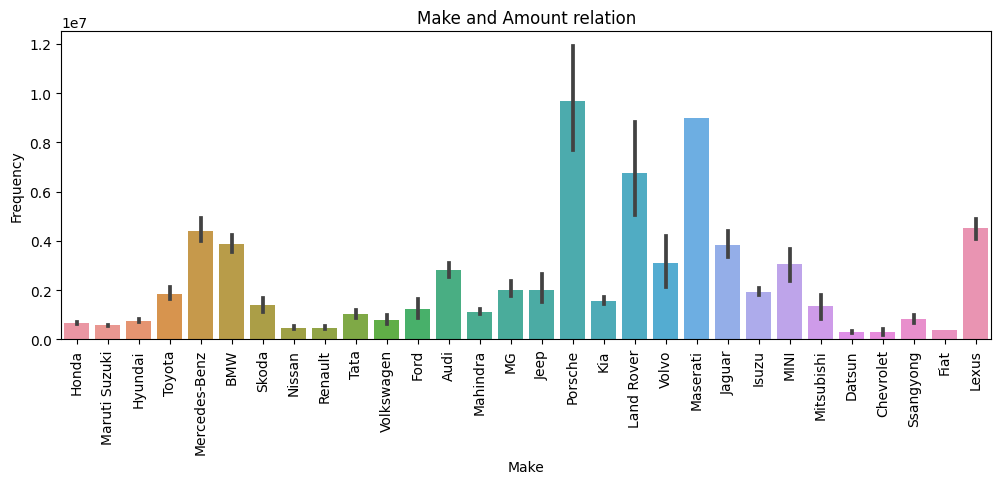

Make: 
 Make
Maruti Suzuki    385
Hyundai          320
Mercedes-Benz    143
Honda            134
Audi             118
Toyota           116
BMW              116
Mahindra         112
Tata              46
Ford              44
Renault           43
Volkswagen        42
Skoda             37
Land Rover        32
Kia               23
Volvo             16
Jeep              16
MG                16
Nissan            15
Jaguar            13
MINI              11
Porsche           10
Datsun             8
Lexus              5
Mitsubishi         4
Chevrolet          4
Ssangyong          3
Isuzu              2
Maserati           1
Fiat               1
Name: count, dtype: int64


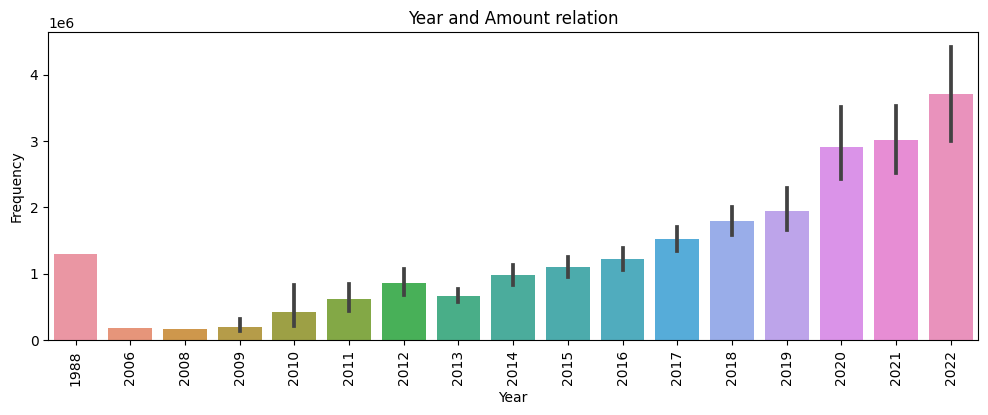

Year: 
 Year
2017    260
2018    259
2019    214
2016    184
2014    179
2015    175
2021    148
2020    127
2013    111
2022     75
2012     57
2011     36
2009      4
2010      4
2006      1
1988      1
2008      1
Name: count, dtype: int64


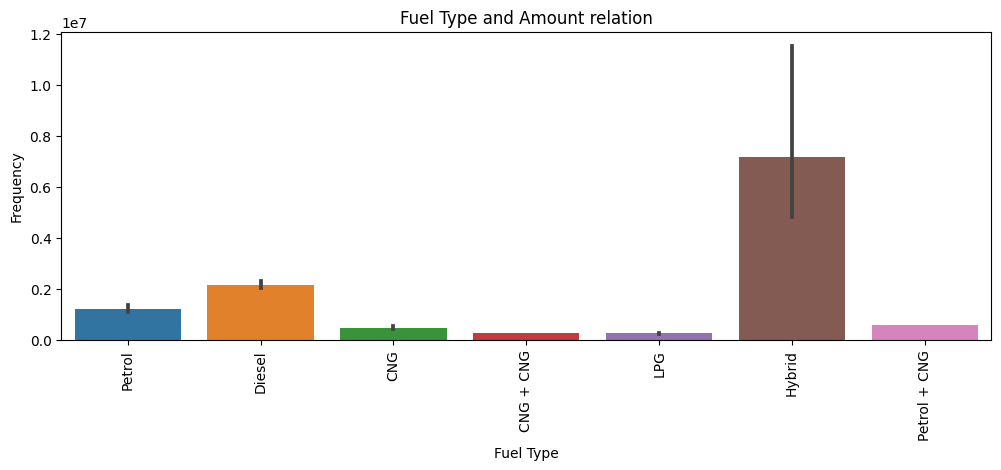

Fuel Type: 
 Fuel Type
Diesel          965
Petrol          818
CNG              45
LPG               3
Hybrid            3
CNG + CNG         1
Petrol + CNG      1
Name: count, dtype: int64


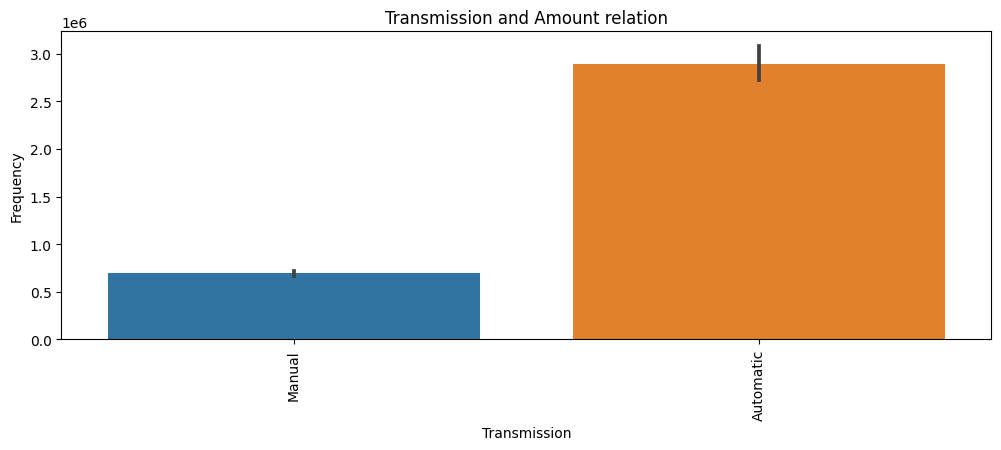

Transmission: 
 Transmission
Manual       1000
Automatic     836
Name: count, dtype: int64


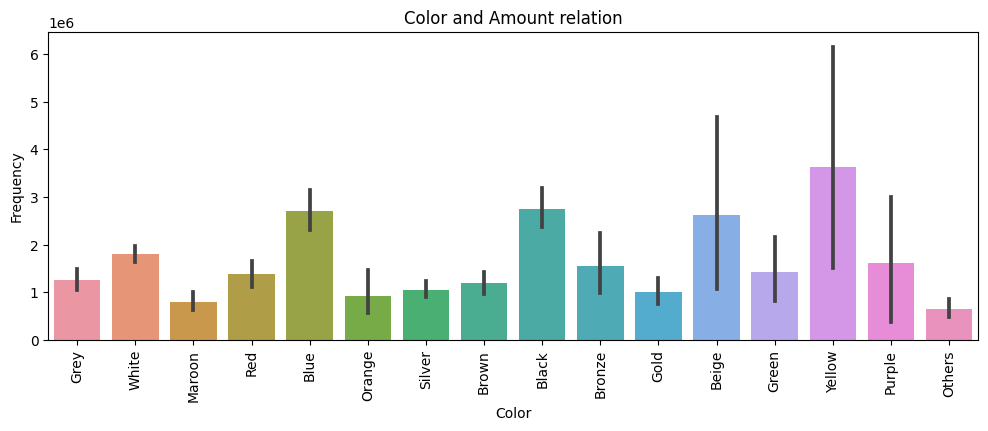

Color: 
 Color
White     723
Silver    246
Grey      199
Blue      168
Black     148
Red       147
Brown      74
Maroon     31
Bronze     26
Gold       21
Orange     16
Green      12
Others     11
Yellow      6
Beige       5
Purple      3
Name: count, dtype: int64


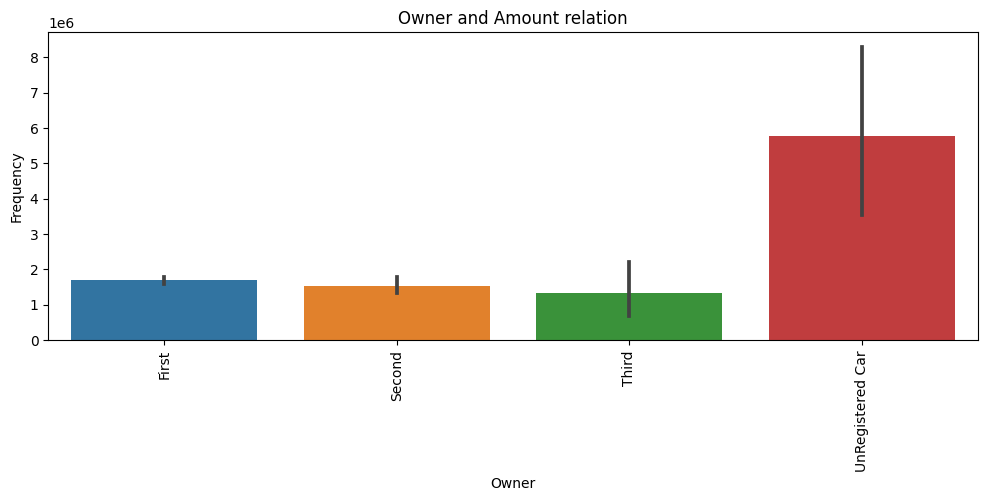

Owner: 
 Owner
First               1496
Second               303
Third                 21
UnRegistered Car      16
Name: count, dtype: int64


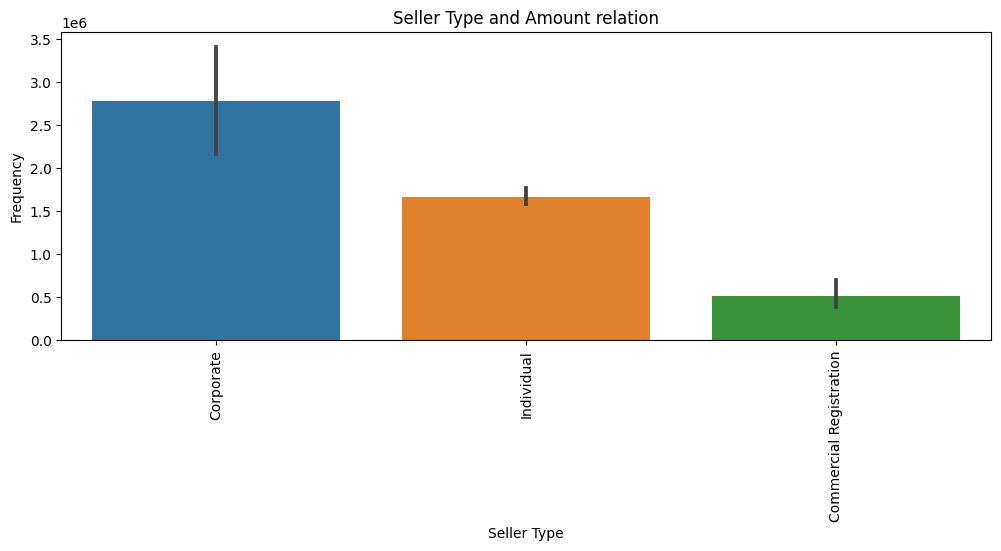

Seller Type: 
 Seller Type
Individual                 1781
Corporate                    50
Commercial Registration       5
Name: count, dtype: int64


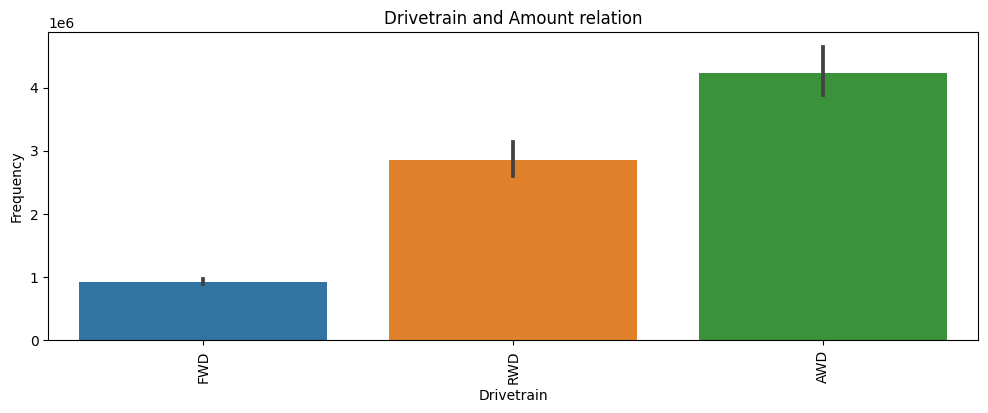

Drivetrain: 
 Drivetrain
FWD    1284
RWD     297
AWD     255
Name: count, dtype: int64


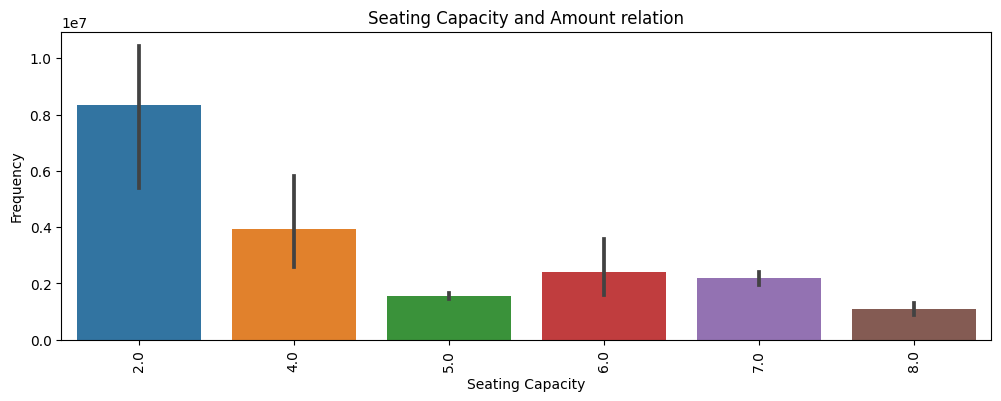

Seating Capacity: 
 Seating Capacity
5.0    1491
7.0     251
4.0      36
8.0      31
6.0      23
2.0       4
Name: count, dtype: int64


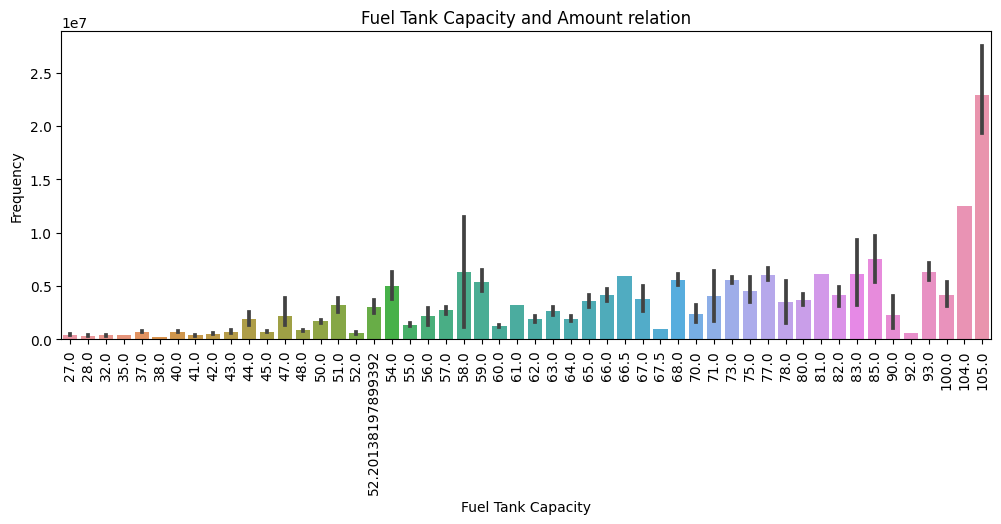

Fuel Tank Capacity: 
 Fuel Tank Capacity
35.000000     184
45.000000     147
60.000000     147
43.000000     131
50.000000     130
40.000000     106
55.000000     105
42.000000      96
37.000000      89
80.000000      84
66.000000      53
70.000000      53
65.000000      51
48.000000      51
57.000000      44
52.201382      41
64.000000      31
28.000000      30
75.000000      29
63.000000      27
32.000000      21
52.000000      20
44.000000      19
93.000000      18
54.000000      14
100.000000     14
67.000000      12
56.000000      11
51.000000       6
83.000000       6
41.000000       6
78.000000       6
77.000000       5
71.000000       5
62.000000       5
27.000000       5
90.000000       4
82.000000       4
85.000000       4
59.000000       3
105.000000      3
47.000000       3
68.000000       2
73.000000       2
58.000000       2
104.000000      1
92.000000       1
66.500000       1
67.500000       1
81.000000       1
61.000000       1
38.000000       1
Name: count, dtype: int

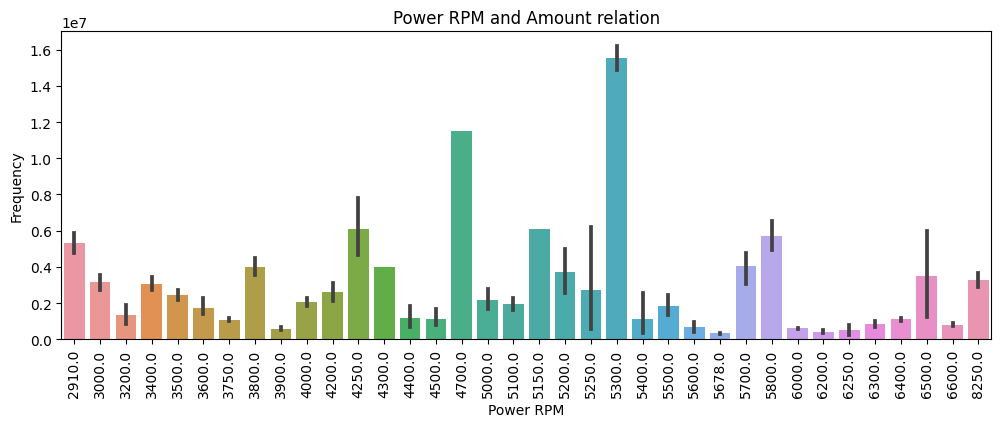

Power RPM: 
 Power RPM
4000.0    431
6000.0    422
3750.0    143
5500.0     96
3600.0     89
3800.0     72
4200.0     71
3400.0     62
5000.0     58
6600.0     54
6200.0     53
3500.0     47
6400.0     35
6300.0     31
4400.0     19
3000.0     16
5200.0     15
5250.0     12
5100.0     12
3200.0     11
6500.0     11
5600.0     11
5400.0     10
5678.0     10
3900.0      8
2910.0      8
5700.0      6
5800.0      5
6250.0      4
4250.0      4
4500.0      3
8250.0      2
5300.0      2
4300.0      1
4700.0      1
5150.0      1
Name: count, dtype: int64


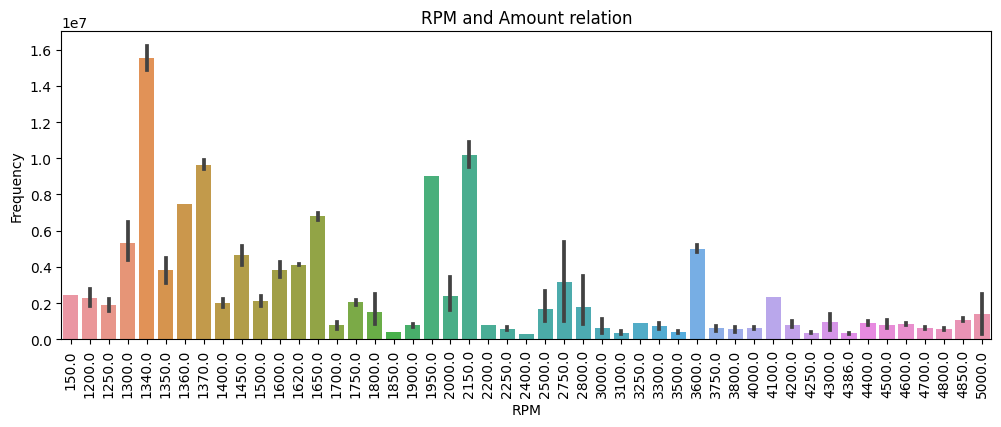

RPM: 
 RPM
1750.0    382
4000.0    240
1500.0    199
1600.0    159
3500.0    128
2000.0     90
1400.0     77
1900.0     55
4200.0     48
4500.0     47
4600.0     42
1800.0     42
4800.0     39
4400.0     35
1200.0     28
4850.0     25
3000.0     25
1250.0     24
4250.0     18
2500.0     14
2800.0     13
3750.0     11
1450.0     11
3800.0     10
4386.0     10
1700.0      8
2250.0      8
4300.0      7
1350.0      4
3100.0      3
4700.0      3
1300.0      3
3300.0      3
2750.0      2
1650.0      2
3600.0      2
2400.0      2
2150.0      2
1370.0      2
1340.0      2
5000.0      2
1620.0      2
1850.0      1
1950.0      1
150.0       1
2200.0      1
3250.0      1
1360.0      1
4100.0      1
Name: count, dtype: int64


In [106]:
for n in categ_variables:
    bar_plot(n)


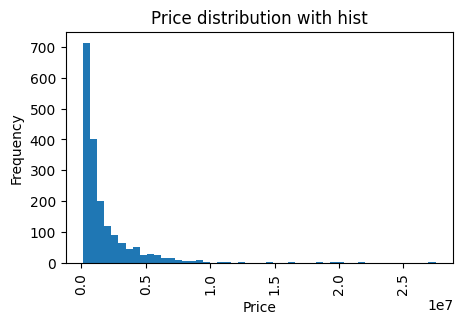

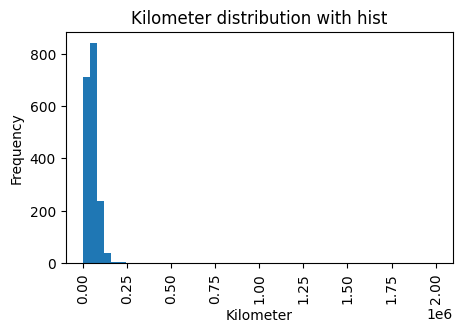

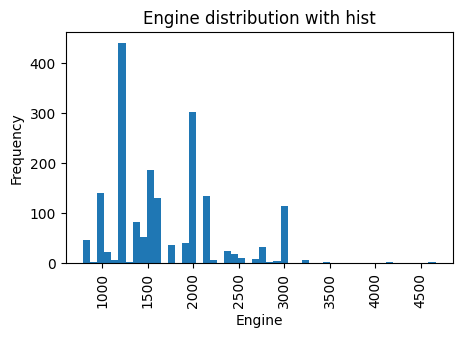

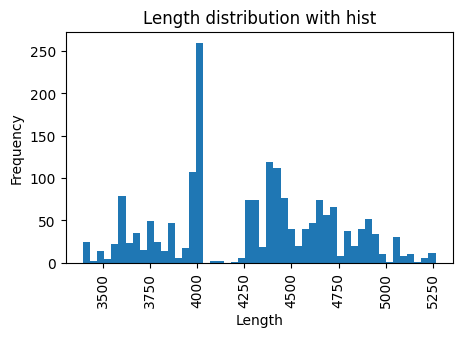

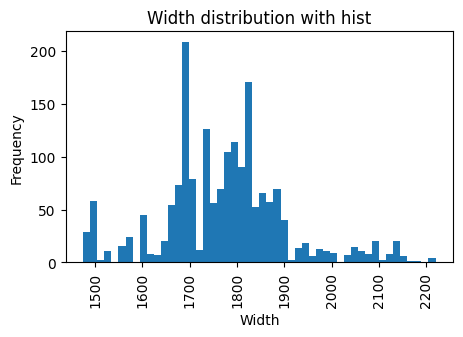

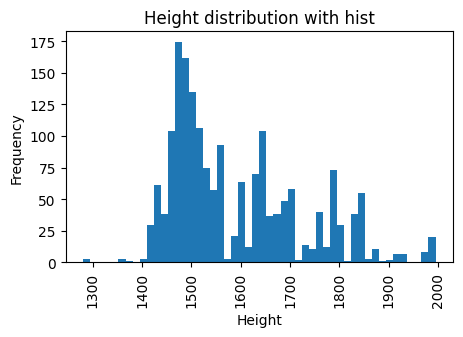

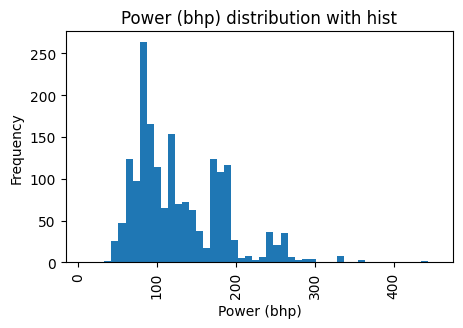

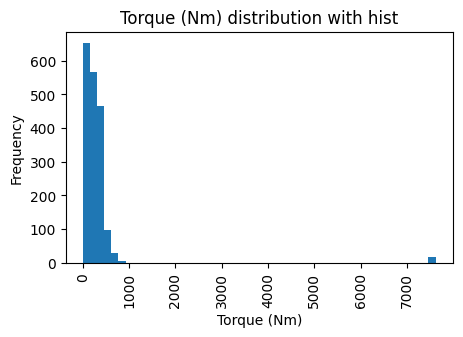

In [107]:
for n in non_categ_variables:
    plot_hist(n)

In [108]:
categ_variables

['Make',
 'Year',
 'Fuel Type',
 'Transmission',
 'Color',
 'Owner',
 'Seller Type',
 'Drivetrain',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Power RPM',
 'RPM']

In [109]:
non_categ_variables

['Price',
 'Kilometer',
 'Engine',
 'Length',
 'Width',
 'Height',
 'Power (bhp)',
 'Torque (Nm)']

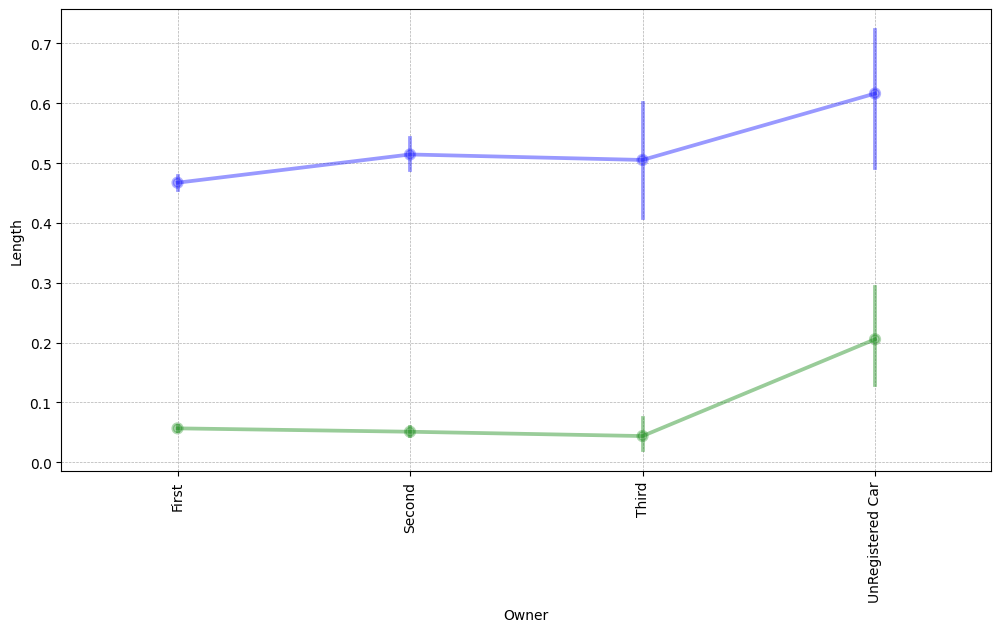

In [110]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunları belirle
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# MinMaxScaler ile normalizasyon yap
scaler = MinMaxScaler()
data_samp = df.copy()
data_samp[numeric_cols] = scaler.fit_transform(df[numeric_cols])  # NumPy yerine direkt DataFrame'e kaydediyoruz

# Görselleştirme
f, ax = plt.subplots(figsize=(12, 6))

pointplot1 = sns.pointplot(data=data_samp, x="Owner", y="Price", color="green", ax=ax)
pointplot2 = sns.pointplot(data=data_samp, x="Owner", y="Length", color="blue", ax=ax)

plt.setp(pointplot2.lines, alpha=0.4)
plt.setp(pointplot2.collections, alpha=0.3)  # Markers için

plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [111]:
def plot_pie_for_all_columns(data):
    for column in categ_variables:
        labels = data[column].value_counts().index
        sizes = data[column].value_counts().values
        explode = [0] * len(sizes)
        
        plt.figure(figsize=(5, 5))
        plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
        plt.title(column, color='blue', fontsize=15)
        plt.show()
        print("\n\n\n")


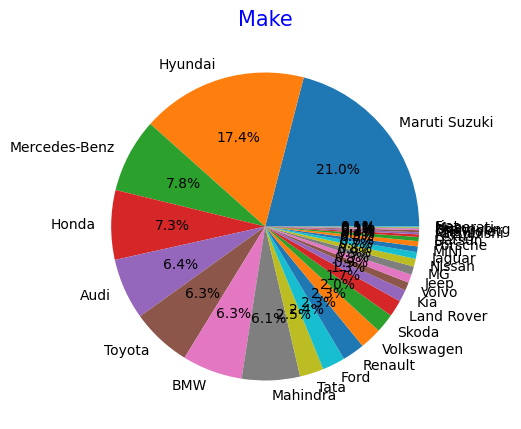

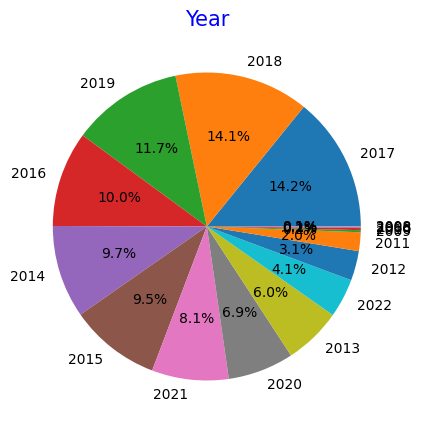

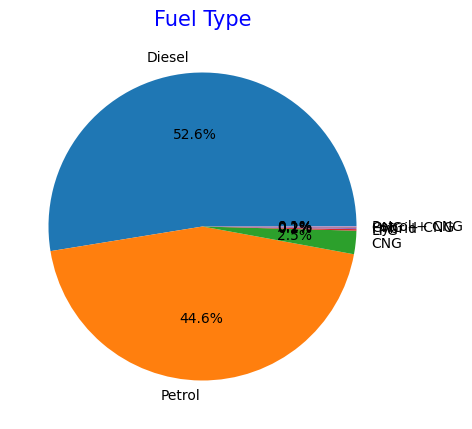

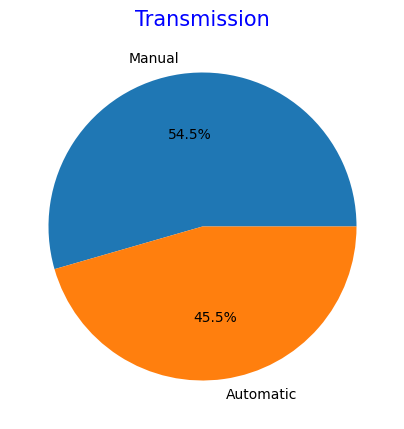

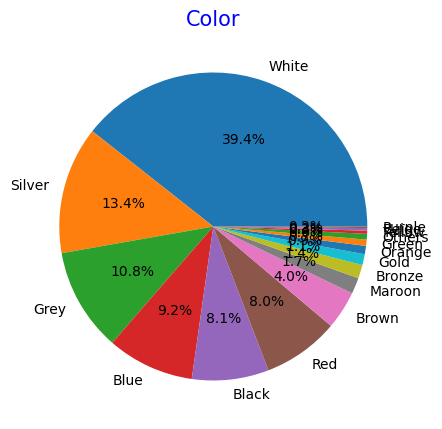

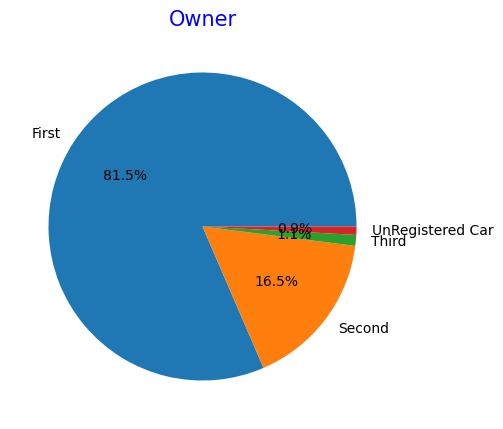

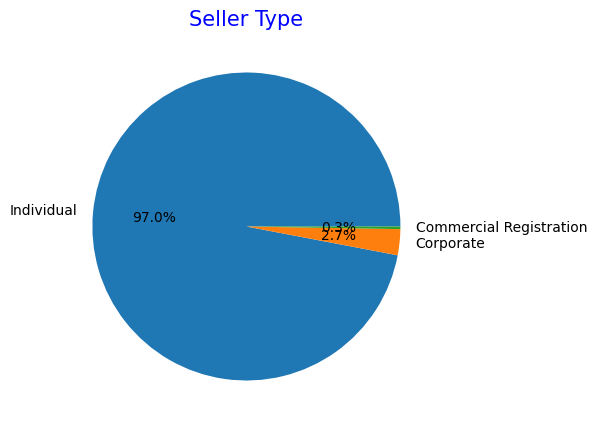

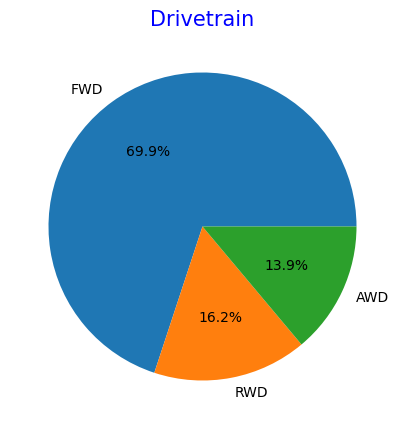

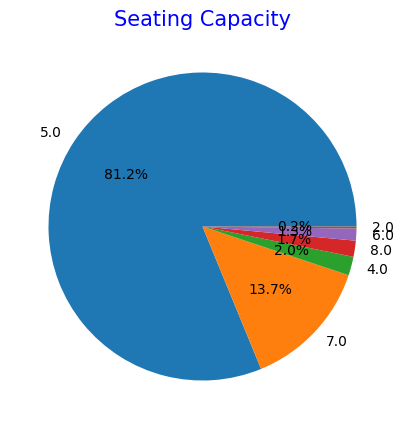

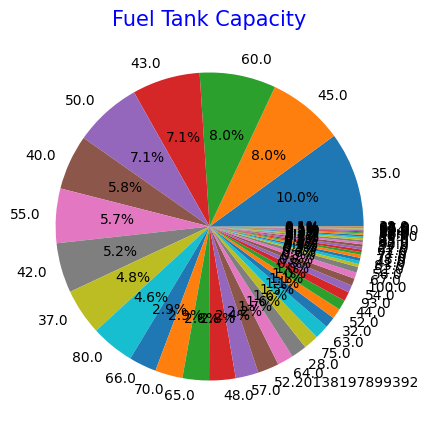

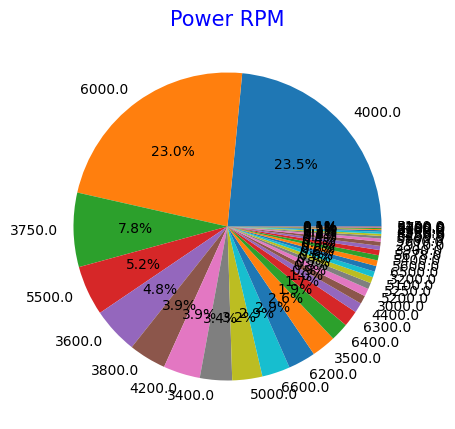

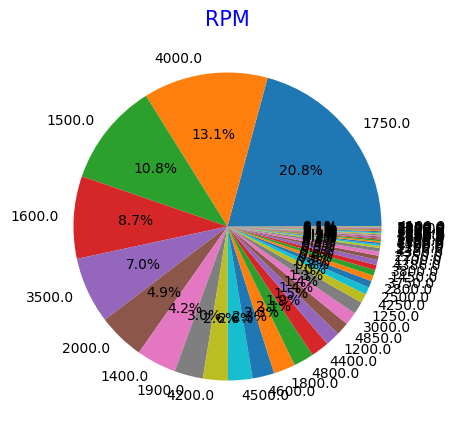

In [112]:
plot_pie_for_all_columns(df)

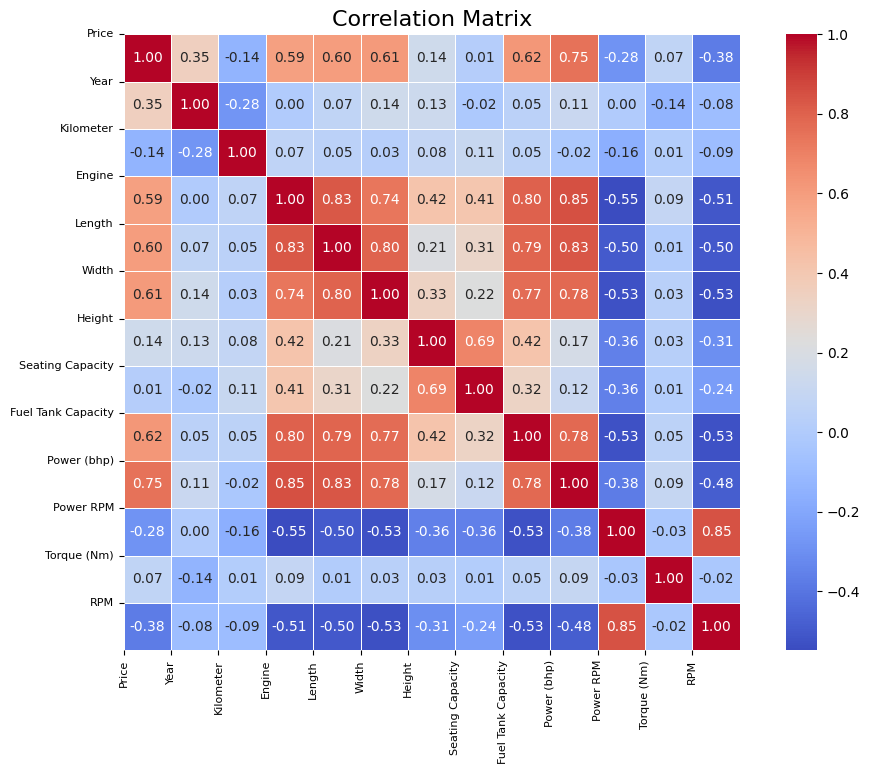

In [113]:
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

f = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.7)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8, rotation=90)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<Figure size 600x200 with 0 Axes>

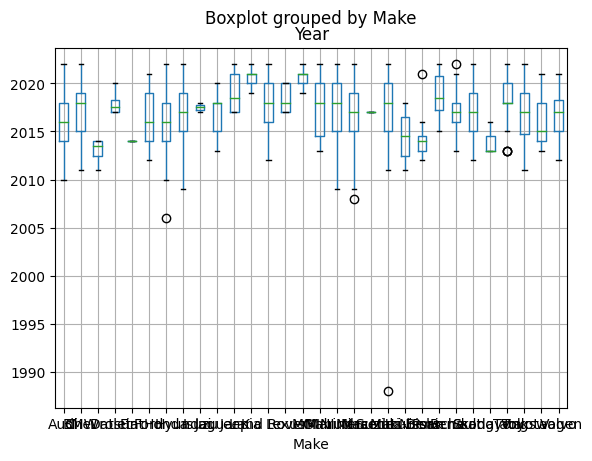

<Figure size 600x200 with 0 Axes>

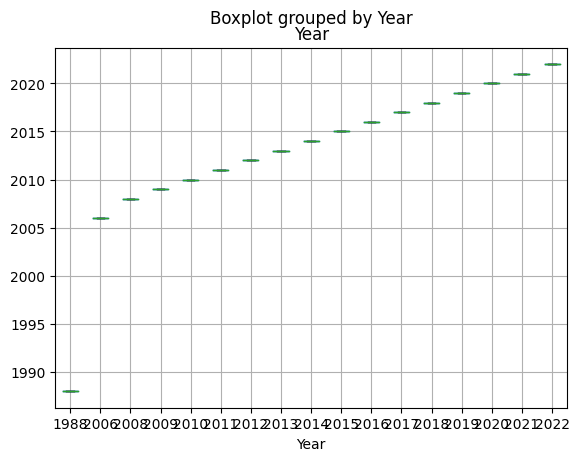

<Figure size 600x200 with 0 Axes>

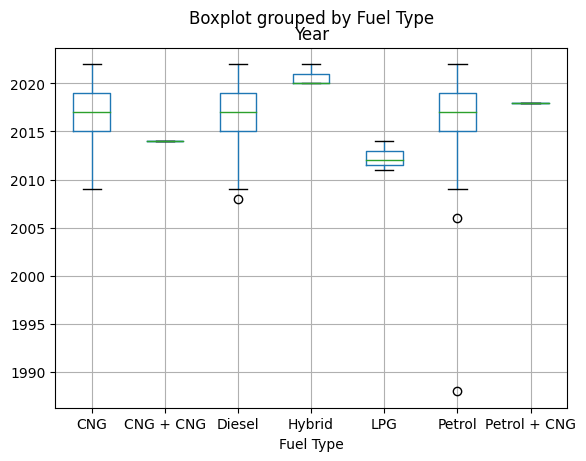

<Figure size 600x200 with 0 Axes>

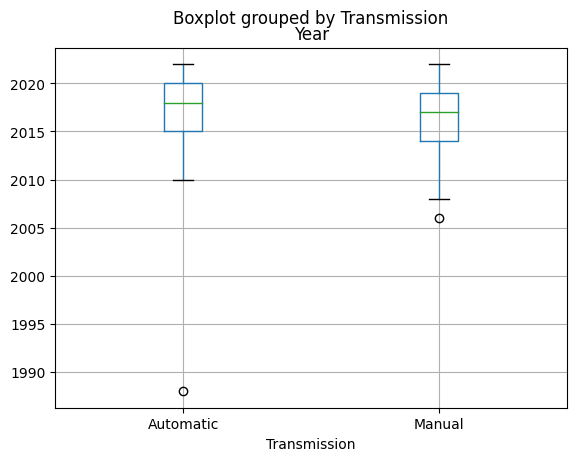

<Figure size 600x200 with 0 Axes>

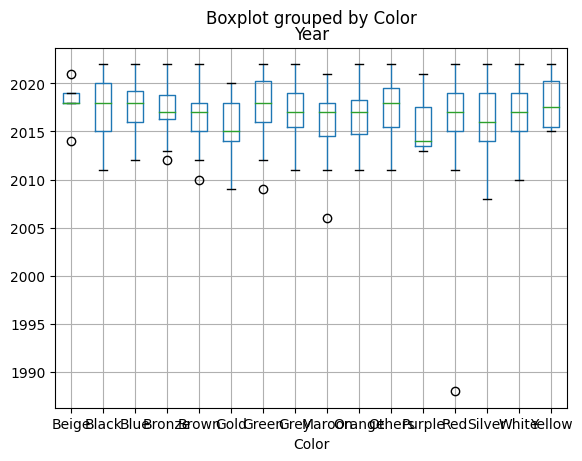

<Figure size 600x200 with 0 Axes>

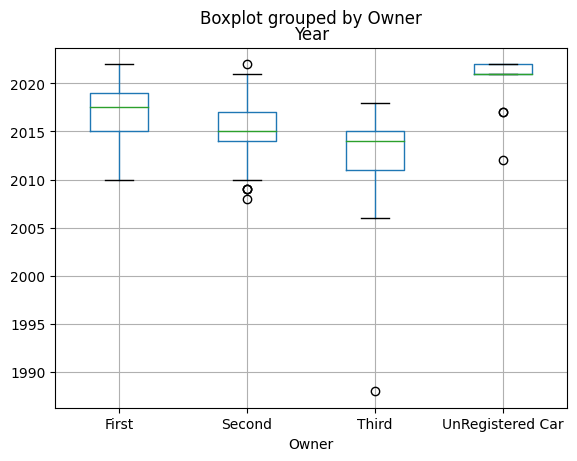

<Figure size 600x200 with 0 Axes>

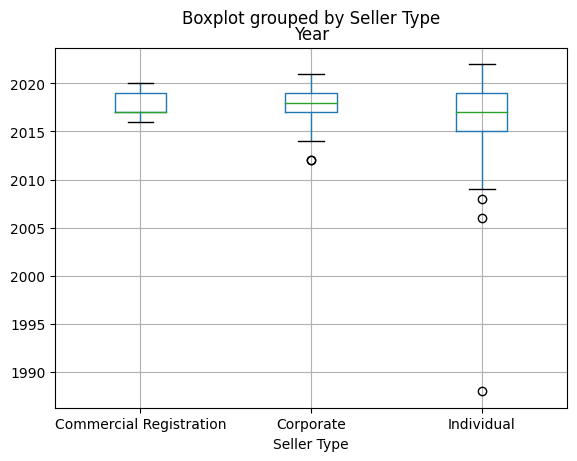

<Figure size 600x200 with 0 Axes>

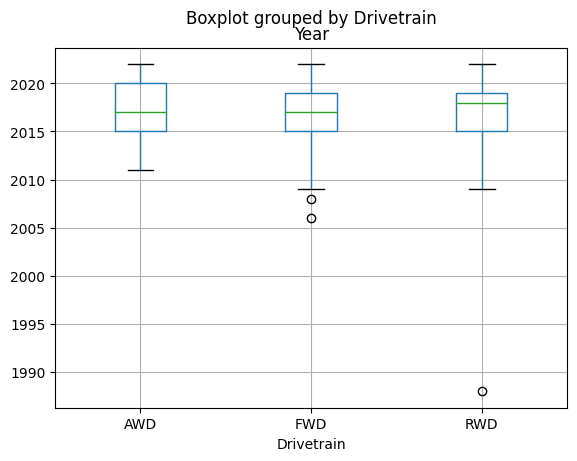

<Figure size 600x200 with 0 Axes>

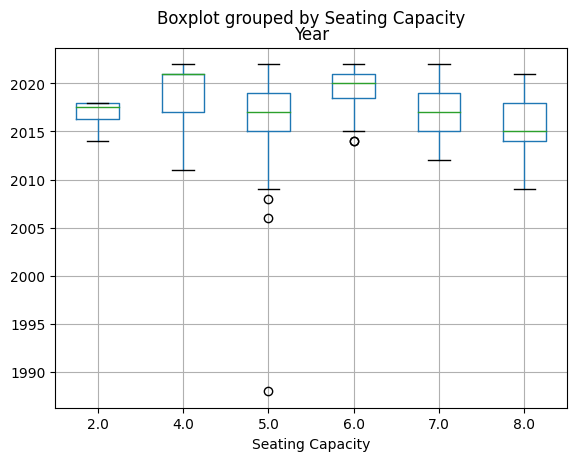

<Figure size 600x200 with 0 Axes>

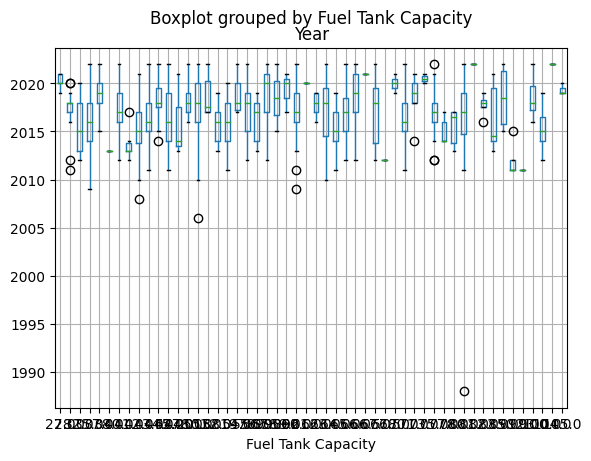

<Figure size 600x200 with 0 Axes>

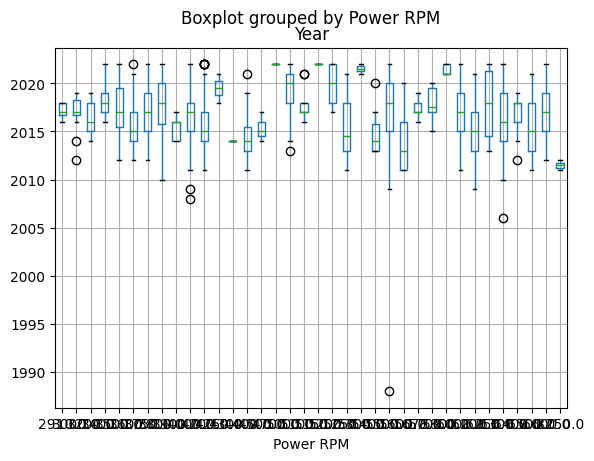

<Figure size 600x200 with 0 Axes>

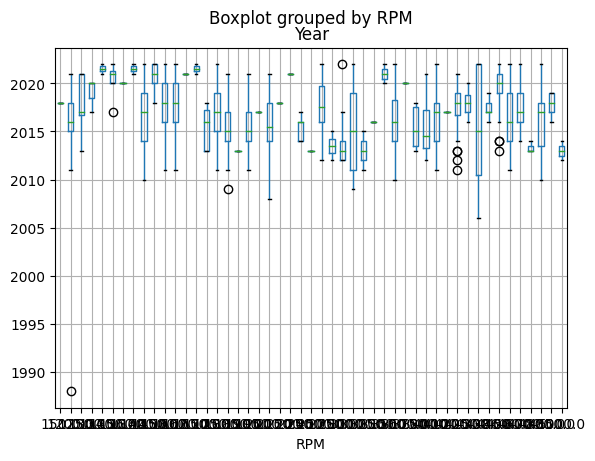

In [114]:
for i in categ_variables:
    plt.figure(figsize = (6,2))
    df.boxplot(column = "Year",by =i)
    plt.show()

<a id ="4"></a>
# ML ve DL için kodlama ve ölçeklendirme

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modeller
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pickle


In [116]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Price')  # 'Price' bağımlı değişken

# One-Hot Encoding ve Ölçeklendirme
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


<a id ="5"></a>
# Makine Öğrenmesi Metodları

In [120]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Veri seti ve hedef değişken
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri tanımlama (özellikler güncellendi)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # Ridge'in regularization parametresi
    "Lasso Regression": Lasso(alpha=0.1),  # Lasso'nun regularization parametresi
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),  # Elastic Net'in alpha ve l1_ratio parametreleri
    "Random Forest": RandomForestRegressor(n_estimators=5000, max_depth=10, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=5000, learning_rate=0.05, max_depth=4, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=5000, learning_rate=0.05, depth=6, verbose=0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(C=1.0, epsilon=0.2)
}

# Sonuçları depolamak için bir liste
results = []

for name, model in models.items():
    # Pipeline tanımlama (veri ön işleme + model)
    pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    
    # Test setinde tahmin yapma
    y_pred = pipe.predict(X_test)

    # Model performansını hesaplama
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Sonuçları listeye ekleme
    results.append([name, rmse, mae, r2])
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

# Sonuçları DataFrame'e çevirme
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R²"])
print(results_df.sort_values(by="RMSE"))

# Sonuçları CSV dosyasına kaydetme
results_df.to_csv("model_results.csv", index=False)
print("Sonuçlar model_results.csv dosyasına kaydedildi.")

# En iyi modeli seçip kaydetme
best_model = pipe
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("En iyi model best_model.pkl dosyasına kaydedildi.")


Linear Regression - RMSE: 976739.27, MAE: 572359.94, R²: 0.7840
Ridge Regression - RMSE: 972645.39, MAE: 574575.16, R²: 0.7858
Lasso Regression - RMSE: 976733.62, MAE: 572358.00, R²: 0.7840
Elastic Net - RMSE: 1096776.94, MAE: 651333.87, R²: 0.7277
Random Forest - RMSE: 496138.83, MAE: 244469.74, R²: 0.9443
Gradient Boosting - RMSE: 508154.35, MAE: 231764.70, R²: 0.9415
XGBoost - RMSE: 550696.63, MAE: 245669.23, R²: 0.9313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 1468, number of used features: 47
[LightGBM] [Info] Start training from score 1666575.567439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[